[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/LokeshBadisa/txv/blob/main/tutorials/model_internals_visualization.ipynb)

# Let's install the txv package

In [1]:
!pip install txv

# Import necessary libraries. 

#### We will use vit-base-patch16-224 model in this tutorial. You can try this with other models in `Available Models` section as well. Note that this package works with models in `Available Models` section only.

In [2]:
from txv.vit import vit_base_patch16_224
from txv.utils import read_image, postprocess, show_exp_on_image
import torch
import matplotlib.pyplot as plt

In [3]:
device = torch.device('cuda:0')
model = vit_base_patch16_224().to(device)

In [4]:
image = read_image('../images/zebra-elephant.png').to(device)

#### Turn on saving of the model internals to visualize them in the next steps. Attention map and it's gradients are saved by default. Here we are saving 7th block's (0-indexing) Q, K and V matrices. You can save other block's matrices as well.

In [5]:
model.blocks[7].attn.issaveq = True
model.blocks[7].attn.issavek = True
model.blocks[7].attn.issavev = True

In [6]:
# Forward pass the image
output = model(image)

#### Extract the query matrix and take mean across heads and head_dim. Visualize with removing the CLS token. `postprocess` does normalization and bilinear interpolation of the query. `show_exp_on_image` merges image and query to show the resultant visualization.

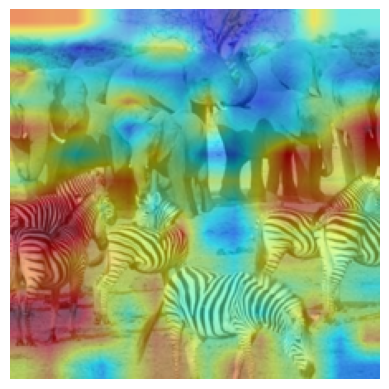

In [7]:
#Get query value
query = model.blocks[7].attn.get_q()

#query is in shape of (batch_size, num_heads, num_patches, head_dim)
query = query.mean(dim=(1,-1))

#Let's remove CLS token
query = query[:,1:]

#postprocess and show_exp_on_image do required processing to get the final visualization
inp,query = postprocess(image, query)
cam = show_exp_on_image(inp[0], query[0])
plt.axis('off')
plt.imshow(cam)
plt.show()

# Similarly, let's visualize key and value

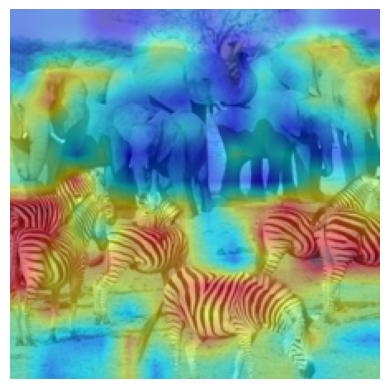

In [8]:
key = model.blocks[7].attn.get_k()
key = key.mean(dim=(1,-1))
key = key[:,1:]
inp,key = postprocess(image, key)
cam = show_exp_on_image(inp[0], key[0])
plt.axis('off')
plt.imshow(cam)

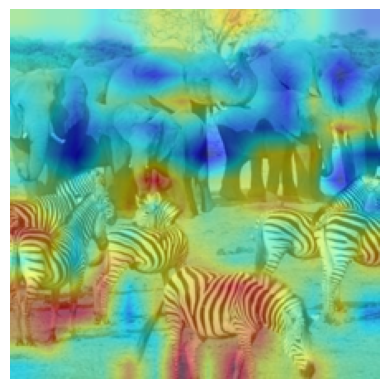

In [9]:
value = model.blocks[7].attn.get_v()
value = value.mean(dim=(1,-1))
value = value[:,1:]
inp,value = postprocess(image, value)
cam = show_exp_on_image(inp[0], value[0])
plt.axis('off')
plt.imshow(cam)

# Now, let's visualize attention.

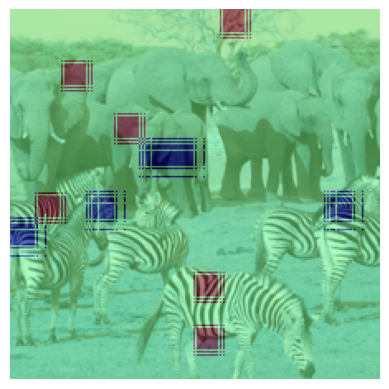

In [10]:
attn = model.blocks[7].attn.get_attn()

# attn is in the shape of (batch_size, num_heads, num_patches, num_patches)
attn = attn.mean(dim=(1,-1))

# Let's remove CLS token
attn = attn[:,1:]

# Postprocessing
inp,attn = postprocess(image, attn)
cam = show_exp_on_image(inp[0], attn[0])
plt.axis('off')
plt.imshow(cam)